
<h1 style="text-align: center"> Spam Email Classifier</h1>

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import numpy as np
from statistics import mode

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

### Dataset Description

<body> 
The dataset contains two columns:<br>
    <br>
<b>text:</b>This column contains the text of emails.<br>
    <br>
<p><b>spam:</b>This is a binary column to represent whether the email belongs to a spam category or not.<br>
<li>0, if the email is not spam. <br>
<li>1, if the email is spam.
</body>

In [4]:
#read dataset
df = pd.read_csv("emails.csv")

In [5]:
#First five rows of the dataset
df.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [6]:
#Renaming columns for more clear understanding
df.rename(columns={"text":"Email", "spam":"Category"}, inplace=True)

In [7]:
#Descriptive analysis
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Email     5728 non-null   object
 1   Category  5728 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 89.6+ KB


In [8]:
#Checking for null values
df.isnull().sum()

Email       0
Category    0
dtype: int64

### Exploratory Data Analysis

In [9]:
value_counts = df["Category"].value_counts()
#Percentage of datapoints in each class
value_counts.apply(lambda x: x/df.shape[0] * 100)

Category
0    76.117318
1    23.882682
Name: count, dtype: float64

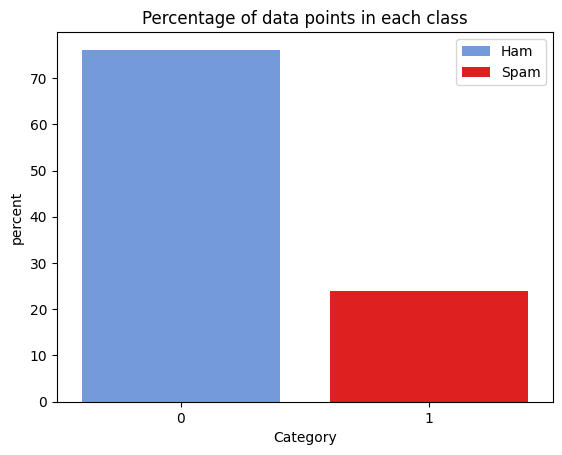

In [10]:
sns.countplot(df, x="Category", hue="Category",  palette=["#6495ED","#FF0000"], legend="auto", stat="percent")
plt.legend(labels=["Ham","Spam"])
plt.title("Percentage of data points in each class")
plt.show()

#### WordCloud

In [11]:
from wordcloud import WordCloud, STOPWORDS

In [12]:
stopwords = set(STOPWORDS)
#Updating stopwords list with some common unimportant words
stopwords.update(["Subject:","subject","re","fwd","fw","will","ect","cc", "vince","kaminski","houston","enron","hou","enron","j","s","pm"])

##### <i> Ham email wordcloud

In [13]:
#Extraxting non-spam emails
ham = df[df["Category"]==0]["Email"]
ham_text = " ".join(email for email in ham)

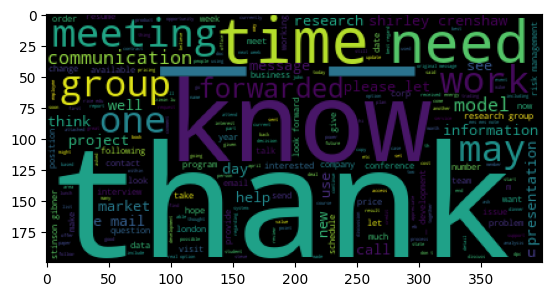

In [14]:
wordcloud = WordCloud(stopwords=stopwords).generate(ham_text)
plt.imshow(wordcloud)

##### <i> Spam mail wordcloud

In [16]:
#Extracting spam emails
spam = df[df["Category"]==1]["Email"]
spam_text = " ".join(email for email in spam)

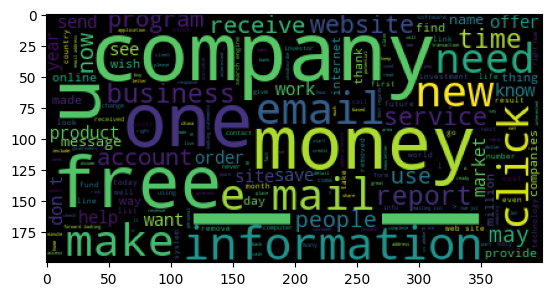

In [17]:
wordcloud = WordCloud(stopwords=stopwords).generate(spam_text)
plt.imshow(wordcloud)

#### Average Length

In [18]:
df["Email Length"] = df["Email"].apply(len)

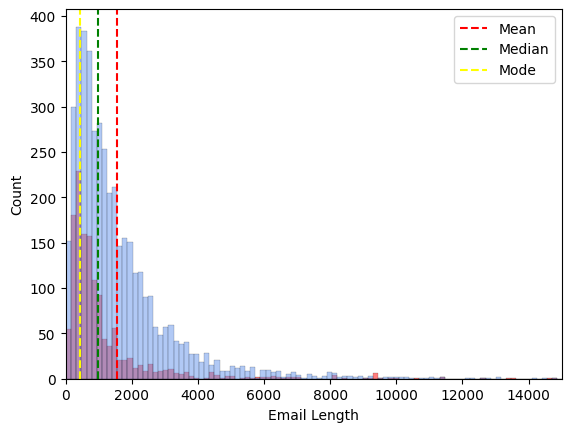

In [19]:
ax = sns.histplot(df, x="Email Length", hue="Category",  palette=["#6495ED","#FF0000"] )
ax.set_xlim(0,15000)
ax.axvline(df["Email Length"].mean(), color="red", linestyle='--', label='Mean')
ax.axvline(df["Email Length"].median(), color="green", linestyle='--', label='Median')
ax.axvline(mode(df["Email Length"]), color="yellow", linestyle='--', label='Mode')
plt.legend(loc=0)

#### Frequent Words in Ham and Spam 

In [20]:
import string
from collections import Counter

In [21]:
#Filtering string in order to display useful common words
def valid_words(text):
    filtered_list = [word for word in text.split() if word.isalpha() and len(word)>2]
    filtered_list = [word for word in filtered_list if not word in stopwords]
    return filtered_list

In [22]:
#Common words in non-spam emails
common_ham = dict(Counter(valid_words(ham_text)).most_common(20))


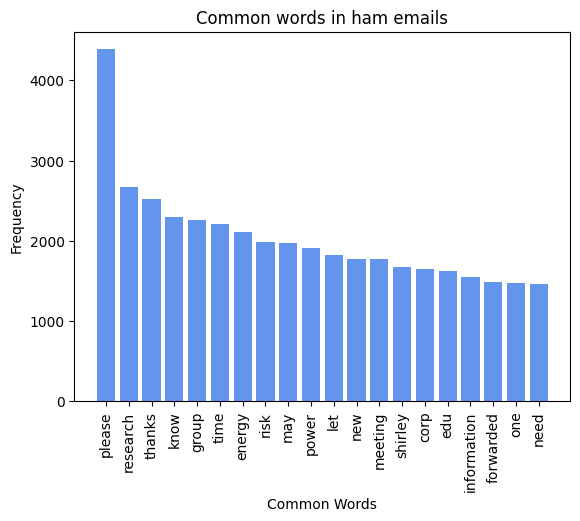

In [23]:
plt.bar(np.arange(len(common_ham)),common_ham.values(), color="#6495ED")
plt.xticks(np.arange(len(common_ham)),common_ham.keys(), rotation=90)
plt.xlabel("Common Words")
plt.ylabel("Frequency")
plt.title("Common words in ham emails")
plt.show()

In [24]:
#common words in spam emails
common_spam = dict(Counter(valid_words(spam_text)).most_common(20))

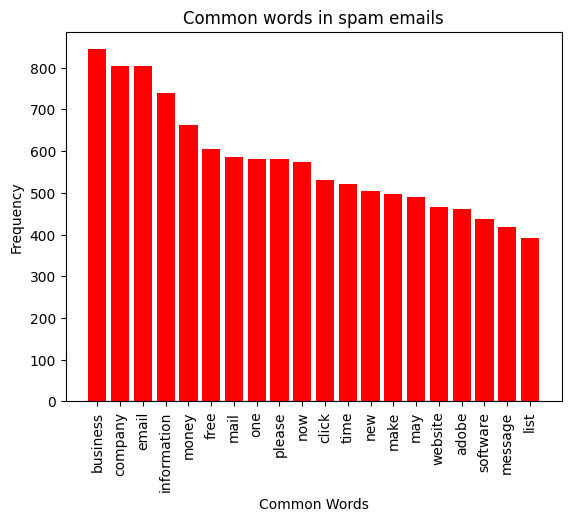

In [25]:
plt.bar(np.arange(len(common_spam)),common_spam.values(), color="#FF0000")
plt.xticks(np.arange(len(common_spam)),common_spam.keys(), rotation=90)
plt.xlabel("Common Words")
plt.ylabel("Frequency")
plt.title("Common words in spam emails")
plt.show()

### Data PreProcessing

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
#Dividing data into independent and dependent variable
X = df["Email"]
y = df["Category"]

In [28]:
#Splitting data into train and test class based on 70:30 ratio
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [29]:
#Converting words into vectors based on tf-idf value
from sklearn.feature_extraction.text import TfidfVectorizer

In [30]:
vectorizer = TfidfVectorizer(min_df=1, stop_words="english", lowercase=True)

In [31]:
#Applying vectorizer to training data
x_train_features = vectorizer.fit_transform(x_train)

In [32]:
#Applying vectorizer ti testing data
x_test_features = vectorizer.transform(x_test)

### Data Modeling

In [40]:
#Import Logistic Regression model with cross validation
from sklearn.linear_model import LogisticRegressionCV

In [41]:
#Fit model to training data
model = LogisticRegressionCV(random_state=42)
model.fit(x_train_features,y_train)

LogisticRegressionCV(random_state=42)

In [42]:
#Chech model accuracy on training data
model.score(x_train_features,y_train)

1.0

#### Model Evaluation

In [43]:
#Import metrics 
from sklearn.metrics import classification_report,accuracy_score,ConfusionMatrixDisplay,RocCurveDisplay,PrecisionRecallDisplay

In [44]:
#predict test data values
pred = model.predict(x_test_features)

In [45]:
print(f""" Classification Report:
{classification_report(y_test,pred)}
Model Accuracy:
{accuracy_score(y_test,pred)}""")

 Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1278
           1       0.99      0.97      0.98       441

    accuracy                           0.99      1719
   macro avg       0.99      0.98      0.99      1719
weighted avg       0.99      0.99      0.99      1719

Model Accuracy:
0.9901105293775451


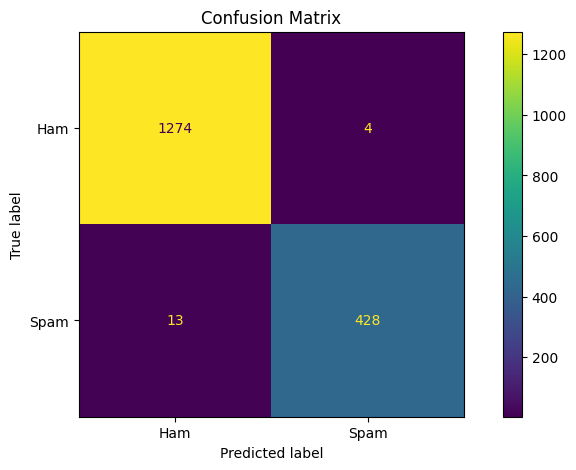

In [46]:
#Confusion Matrix
fig, ax = plt.subplots(figsize=(10, 5))
ConfusionMatrixDisplay.from_predictions(y_test,pred, ax=ax)
ax.xaxis.set_ticklabels(["Ham","Spam"])
ax.yaxis.set_ticklabels(["Ham","Spam"])
plt.title("Confusion Matrix")
plt.show()

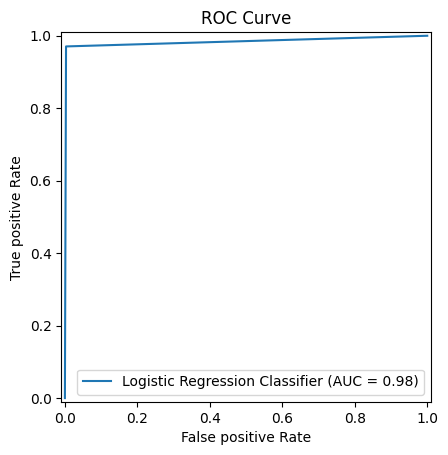

In [47]:
#Roc curve
RocCurveDisplay.from_predictions(y_test, pred, name="Logistic Regression Classifier")
plt.xlabel("False positive Rate")
plt.ylabel("True positive Rate")
plt.title("ROC Curve")
plt.show()

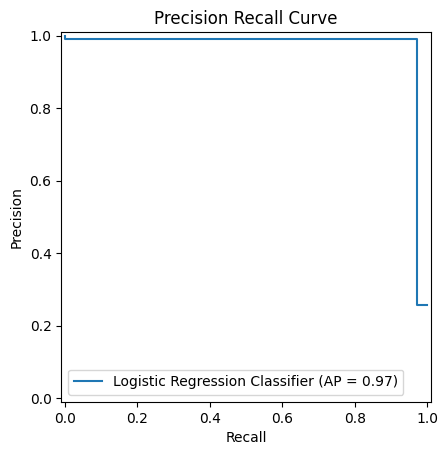

In [48]:
PrecisionRecallDisplay.from_predictions(y_test, pred, name="Logistic Regression Classifier")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision Recall Curve")
plt.show()

#### Predictions

In [49]:
#function to vectorize input and make prediction on that input
def predict(msg):
    input_msg = vectorizer.transform(msg)
    prediction = model.predict(input_msg)
    if prediction[0]==1:
        print("spam")
    else:
        print("ham")

In [50]:
#Making prediction on a ham message to check model accuracy
msg = ["Now featuring more Learning Paths and a streamlined structure, it’s easier than ever to find the right path for your skill level and goals."]

In [51]:
predict(msg)

ham


In [52]:
#Making prediction on a spam message to check model accuracy
msg2 = ["Relax.We've all heard it—and maybe even told ourselves to do it. But actually finding time to unwind is another story.Real rest doesn't just happen.It requires intention, especially when life feels nonstop.If you're looking for a place to start, read on for a few simple tips on how to incorporate"]

In [53]:
predict(msg2)

spam


### Data Modeling with OverSampling

##### OverSampling <br>
Since, the dataset is imbalanced applying an oversampling technique will balance the majority and minority class

In [54]:
from imblearn.over_sampling import RandomOverSampler

In [55]:
#Before sampling
Counter(y_train)

Counter({0: 3082, 1: 927})

In [56]:
ros = RandomOverSampler(random_state=42)
x_res,y_res = ros.fit_resample(x_train_features,y_train)

In [57]:
#After sampling
Counter(y_res)

Counter({0: 3082, 1: 3082})

In [58]:
model_res = LogisticRegressionCV(random_state=42)
model_res.fit(x_res,y_res)

LogisticRegressionCV(random_state=42)

In [59]:
res_pred = model_res.predict(x_test_features)

In [61]:
print(f"""Classification Report:
{classification_report(y_test,res_pred)}
Accuracy Score:
{accuracy_score(y_test,res_pred)}""")

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1278
           1       0.99      0.99      0.99       441

    accuracy                           0.99      1719
   macro avg       0.99      0.99      0.99      1719
weighted avg       0.99      0.99      0.99      1719

Accuracy Score:
0.9941826643397323


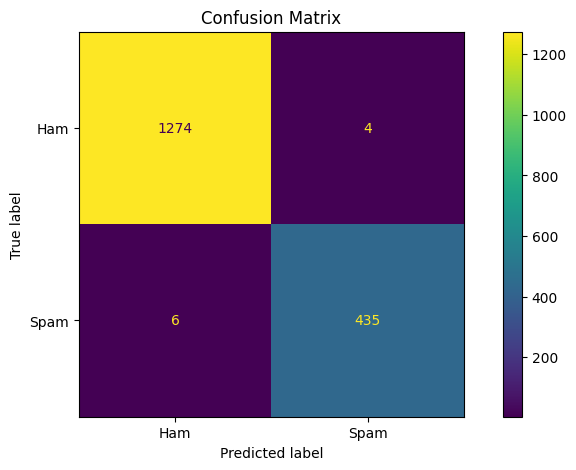

In [62]:
fig, ax = plt.subplots(figsize=(10, 5))
ConfusionMatrixDisplay.from_predictions(y_test,res_pred, ax=ax)
plt.title("Confusion Matrix")
ax.xaxis.set_ticklabels(["Ham","Spam"])
ax.yaxis.set_ticklabels(["Ham","Spam"])
plt.show()

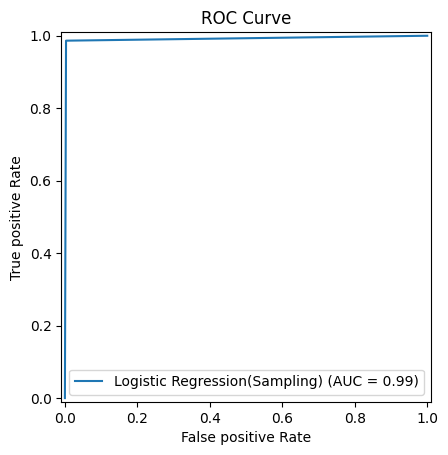

In [63]:
#Roc curve
RocCurveDisplay.from_predictions(y_test, res_pred, name="Logistic Regression(Sampling)")
plt.xlabel("False positive Rate")
plt.ylabel("True positive Rate")
plt.title("ROC Curve")
plt.show()

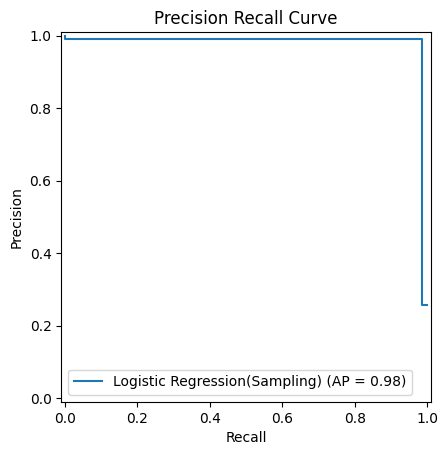

In [64]:
PrecisionRecallDisplay.from_predictions(y_test, res_pred, name="Logistic Regression(Sampling)")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision Recall Curve")
plt.show()